In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7570105521606154103
 xla_global_id: -1]

In [ ]:
%pwd

'/content'

In [ ]:
!unzip "/content/drive/MyDrive/archive_z.zip"

Archive:  /content/drive/MyDrive/archive_z.zip
   creating: archive_z/
   creating: archive_z/AugmentedAlzheimerDataset/
   creating: archive_z/AugmentedAlzheimerDataset/MildDemented/
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/000cdcc4-3e54-4034-a538-203c8047b564.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/001f15e8-6ad4-4e7a-bc36-b62b984dad69.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/001f89e3-8207-4ee4-80d7-711c2acd191a.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/00a03a9d-f709-4516-8a50-7d39c8329d37.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/00a59d3a-8d10-4e10-b5ce-1373a4e89189.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/00a65316-a8c6-46d3-af53-4fdf234d2fcf.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/00a89d56-bb82-429f-95c4-6f1e661629f5.jpg  
  inflating: archive_z/AugmentedAlzheimerDataset/MildDemented/00a8b416-a0cf-4aa5-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras.applications.densenet import DenseNet121
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from keras.optimizers import Adam

In [ ]:
Image_size = [224,224]
valid_path = "/content/archive_z/OriginalDataset"
train_path = "/content/archive_z/AugmentedAlzheimerDataset"

In [ ]:
densenet = DenseNet121(include_top=False, input_shape=Image_size+[3], weights="imagenet")

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
plot_model(densenet)
for layer in densenet.layers:
  layer.trainable = False

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.78911 to fit



In [ ]:
folders = glob("/content/archive_z/OriginalDataset/*")
folders

['/content/archive_z/OriginalDataset/VeryMildDemented',
 '/content/archive_z/OriginalDataset/MildDemented',
 '/content/archive_z/OriginalDataset/NonDemented',
 '/content/archive_z/OriginalDataset/ModerateDemented']

In [ ]:
x = Flatten()(densenet.output)

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x)
model = Model(inputs=densenet.input, outputs=prediction)
plot_model(model)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785422 to fit



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
training_set =  train_datagen.flow_from_directory("/content/archive_z/AugmentedAlzheimerDataset",
                                                       target_size=(224,224), 
                                                       batch_size=32, 
                                                       class_mode="categorical")

test_set =  train_datagen.flow_from_directory("/content/archive_z/OriginalDataset",
                                                       target_size=(224,224), 
                                                       batch_size=32, 
                                                       class_mode="categorical")

Found 1000 images belonging to 4 classes.
Found 1314 images belonging to 4 classes.


In [ ]:
#EĞİTİM AŞAMASI

In [ ]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 30,
    steps_per_epoch = len(training_set),
    validation_steps= len(test_set)
)

#eğitim 50 adımda (epoch) gerçekleşecek
#model parçalar halinde eğitime katılır; hepsi aynı anda değil
#ilk parça eğitildikten sonra modelin başarımı test edilir ve başarıma göre backpropagation yapılır (ağırlıklar güncellenir))
#daha sonra ağırlıklar güncellenir ve yeni eğitim kümesi ile model tekrar eğitilir

Epoch 1/30
32/32 [==============================] - 345s 11s/step - loss: 10.3814 - accuracy: 0.3700 - val_loss: 2.9646 - val_accuracy: 0.4543
Epoch 2/30
32/32 [==============================] - 337s 11s/step - loss: 2.3497 - accuracy: 0.5950 - val_loss: 1.9079 - val_accuracy: 0.5342
Epoch 3/30
32/32 [==============================] - 345s 11s/step - loss: 0.8083 - accuracy: 0.7550 - val_loss: 1.2273 - val_accuracy: 0.5951
Epoch 4/30
32/32 [==============================] - 346s 11s/step - loss: 0.3698 - accuracy: 0.8690 - val_loss: 1.5660 - val_accuracy: 0.5708
Epoch 5/30
32/32 [==============================] - 345s 11s/step - loss: 0.2511 - accuracy: 0.8950 - val_loss: 1.0416 - val_accuracy: 0.6339
Epoch 6/30
32/32 [==============================] - 342s 11s/step - loss: 0.1345 - accuracy: 0.9560 - val_loss: 1.7689 - val_accuracy: 0.5563
Epoch 7/30
32/32 [==============================] - 342s 11s/step - loss: 0.2724 - accuracy: 0.8900 - val_loss: 1.8214 - val_accuracy: 0.5769
Epoch

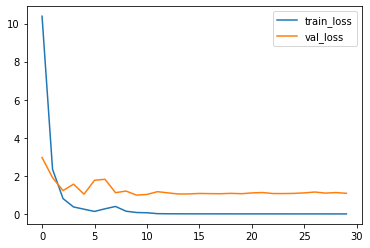

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="train_loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()
plt.savefig("Loss")

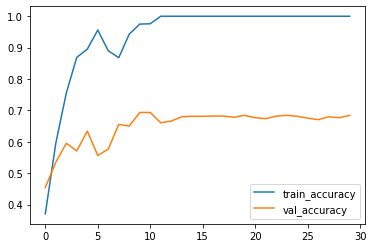

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label="train_accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("model.h5")

In [ ]:
y_pred= model.predict(test_set)

42/42 [==============================] - 218s 5s/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
model = load_model("model.h5")
img= image.load_img("/content/archive_z/OriginalDataset/VeryMildDemented/verymildDem33.jpg",target_size=(224,224))
x=image.img_to_array(img)

In [ ]:
x= x/225
x= np.expand_dims(x, axis=0)
img_data=preprocess_input(x)

preds= model.predict(x)
preds= np.argmax(preds, axis=1)
if(preds==1):
  preds="Mild Demented"
elif(preds==2):
  preds="Moderate Demented"
elif(preds==3):
  preds="Non Demented"
elif(preds==4):
  preds="Very Mild Demented"

print(preds)


1/1 [==============================] - 3s 3s/step
Non Demented
